# Importing Required Libraries :


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset :

In [2]:
df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The dataset contains both dependent and independent varaibles and also contains both categorical and numerical data.In this dataset "loan_status" is our target variable which has two classes.So this is a "Classification type" problem .

# Exploratory Data Analysis(EDA)

In [3]:
# Checking No of Rows and columns :
    
df.shape  

(614, 13)

In [4]:
# First 5 rows of dataset :
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Last 5 rows of dataset :
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
# Checking columns name:

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# Checking datatypes of all columns :

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


It gives the information about the dataset which includes indexing type, column type, null values and memory usage.

In [9]:
# Checking unique values in each column

df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

These are the number of unique values present in each columns.

loan ID of the applicant does not help so we can drop this.

In [10]:
# Dropping irrelevant columns

df.drop(columns=["Loan_ID"], axis=1, inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
#Now check size of dataset :
df.shape

(614, 12)

Now it has 12 columns.

In [12]:
# Checking Missing values in dataset :

df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now we fill categorical values with mode and continuous values with mean/median

In [13]:
# filling null values with median in numerical columns

df.fillna(df.median(), inplace=True)

In [14]:
# Checking again null values :

df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now there are no null values as we treated null values.

# Heatmap of null values

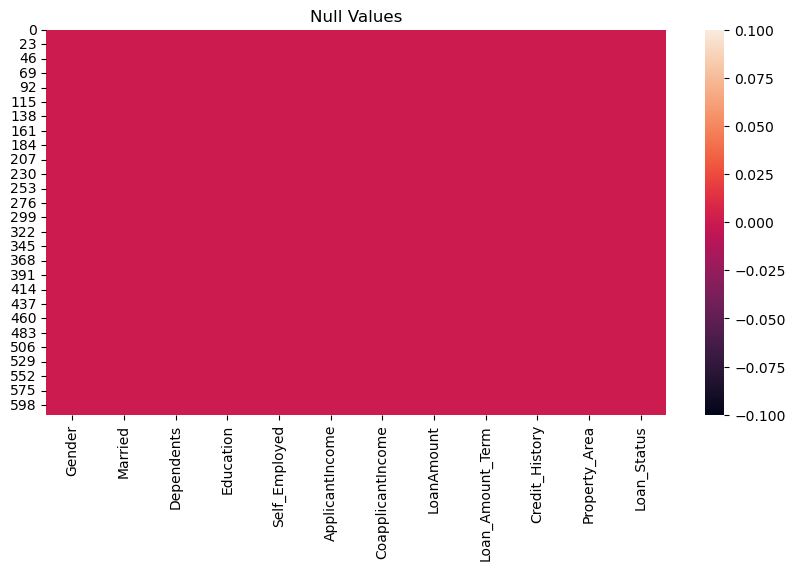

In [17]:
# lets visualize the null values clearly

plt.figure(figsize=[10,5])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

I can see in graph that there is no null values in the given dataset.

In [18]:
# checking the uniqueness of Target Variable :

df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

There are 2 unique values in target variable.

In [19]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
# checking whether the dataset contains any space

df.loc[df['Loan_Status']==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


It seems that there are no spaces in the dataset.

# Data Analysis and Visulization

Statistical measure of dataset :

In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


All statistical data of all rows shown for each parameters like mean, minimum, maximum , 25th percentile means how much value for each column are below 25th percentile ,similarly for 50th perecntile and 75th perecntile.

In [22]:
#want to describe along categorical data

df.describe(include=['O'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,502,401,360,480,532,233,422


# Finding Columns as (Categorical) V/S (Numerical) Columns

In [23]:
# Separating categorical columns :

categorical_columns=[]

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Here, we found out list of categorical columns.

In [24]:
# Separating numerical columns:

numerical_columns=[]

for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Here, we found out list of numerical columns.

# Data Visualization

Univariate Analysis

In [25]:
## Plotting Count Plot for categorical columns 

Y    422
N    192
Name: Loan_Status, dtype: int64


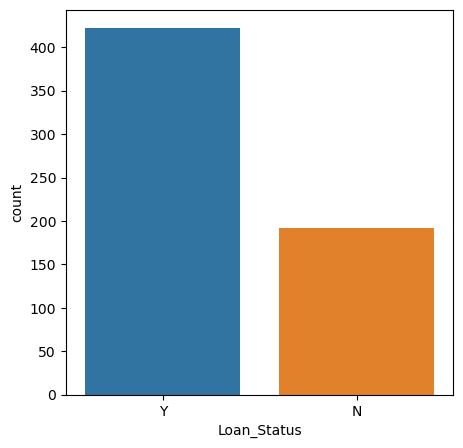

In [26]:
# # visualizing the loan_status

print(df["Loan_Status"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(x="Loan_Status",data=df)
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


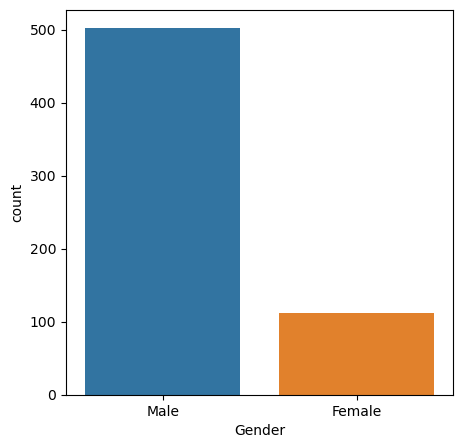

In [27]:
# # visualizing the Gender

print(df["Gender"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(x="Gender",data=df)
plt.show()

Male applied for loan are more.

Yes    401
No     213
Name: Married, dtype: int64


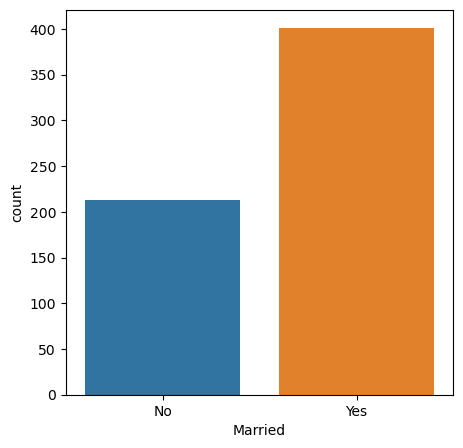

In [28]:
# # visualizing the Married

print(df["Married"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(x="Married",data=df)
plt.show()

Married people applied for loan are more

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


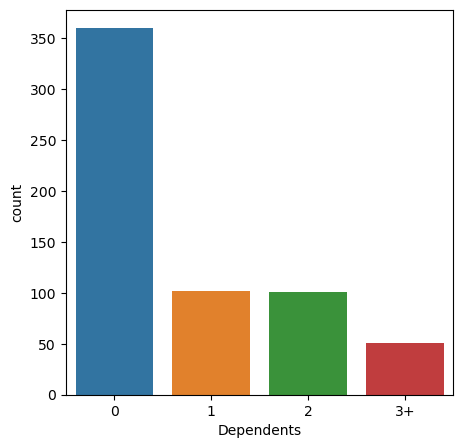

In [29]:
# # visualizing the Dependents

print(df["Dependents"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(x="Dependents",data=df)
plt.show()

Shown Value counts for each value

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


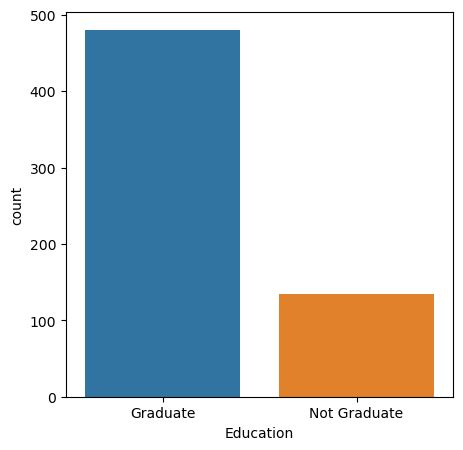

In [30]:
# # visualizing the Education

print(df["Education"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(x="Education",data=df)
plt.show()

Graduate People are more who applied for loan

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


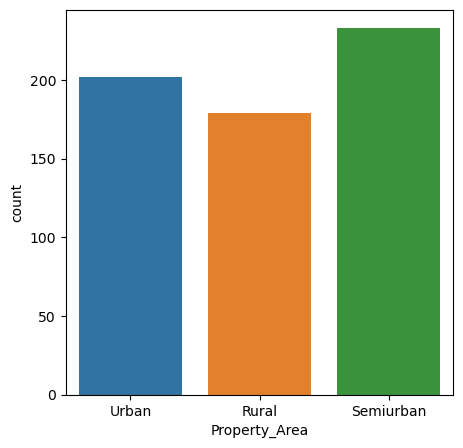

In [31]:
# # visualizing the Property_Area

print(df["Property_Area"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(x="Property_Area",data=df)
plt.show()

Semiurban people are more applied for loan.

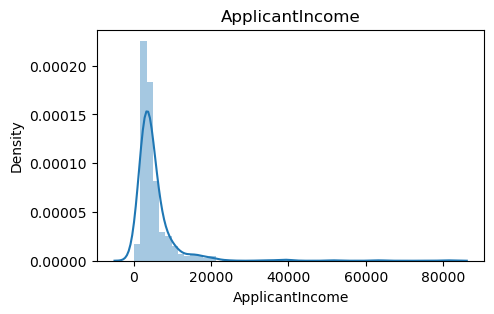

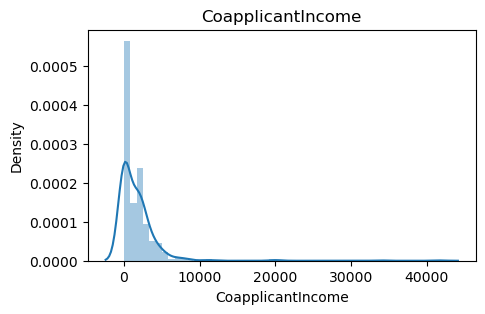

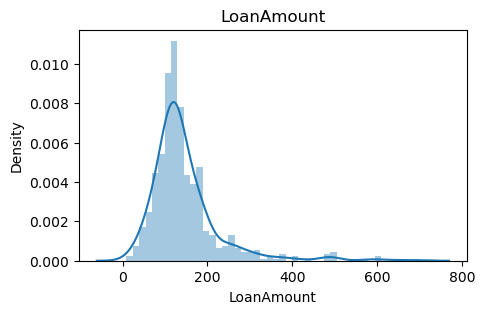

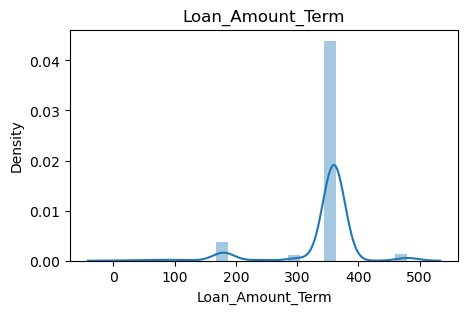

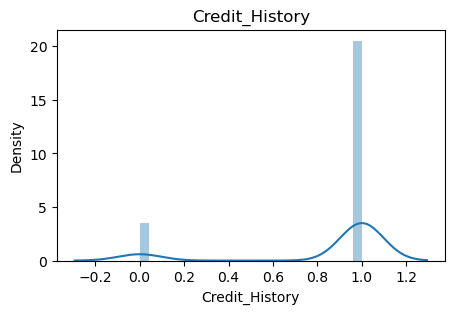

In [32]:
## As there are many numrical columns we can apply loop :

for i in df[numerical_columns]:              
    plt.figure(figsize = (5,3))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

The data is not normally distributed in any of the columns. The mean value is greater than the median in ApplicantIncome, CoapplicantIncome, LoanAmount and TotalIncome which means they are skewed to right. The median is greater than the mean in Loan_Amount_Term and Credit_History columns which means they are skewed to left. We will remove these skewness using appripriate methods in the later part.

# Bivariate Analysis :

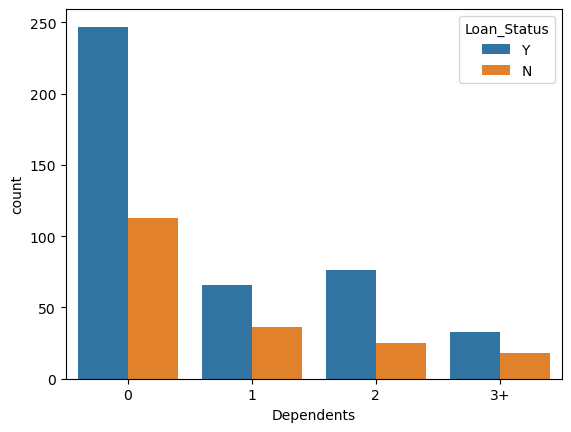

In [38]:
#Visualizing count of Dependents of the applicants on the basis of loan status
sns.countplot(x="Dependents",hue="Loan_Status",data=df)
plt.show()


Count of 0 dependents is high which means most of the applicants have no dependents.The applicants who have dependents 0 are more likely to get their loan approved.

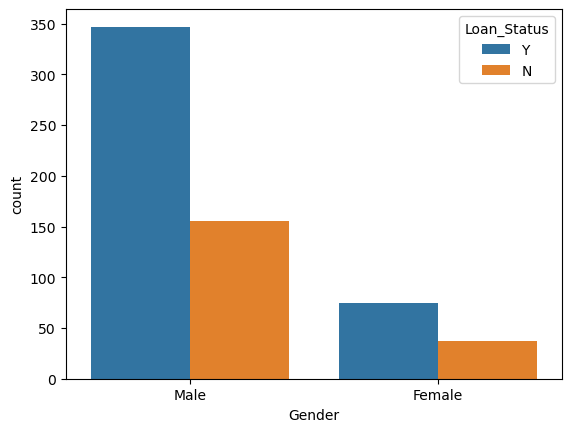

In [39]:
#Visualizing count of Gender on the basis of loan status
sns.countplot(x="Gender",hue="Loan_Status",data=df)
plt.show()

The Male applicants are more likely to get their loan approved.

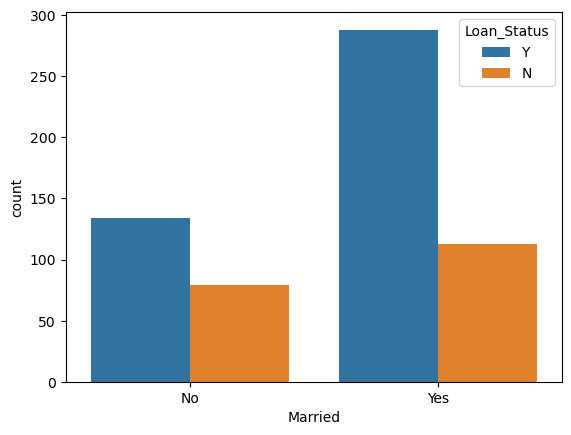

In [40]:
#Visualizing count of Married on the basis of loan status
sns.countplot(x="Married",hue="Loan_Status",data=df)
plt.show()

The Married applicants are more likely to get their loan approved.

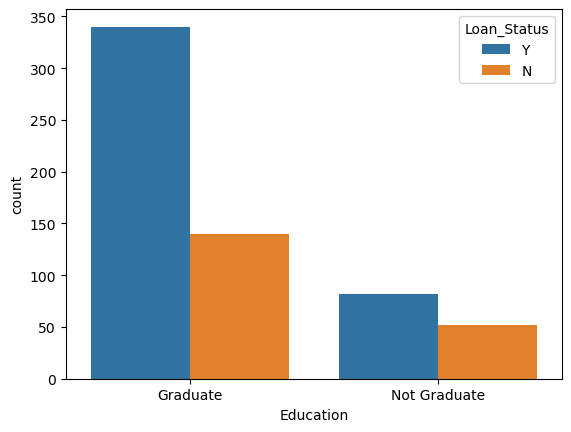

In [45]:
#Visualizing count of Education on the basis of loan status
sns.countplot(x="Education",hue="Loan_Status",data=df)
plt.show()

The applicants who are graduated have tendency of getting loans than who are not.

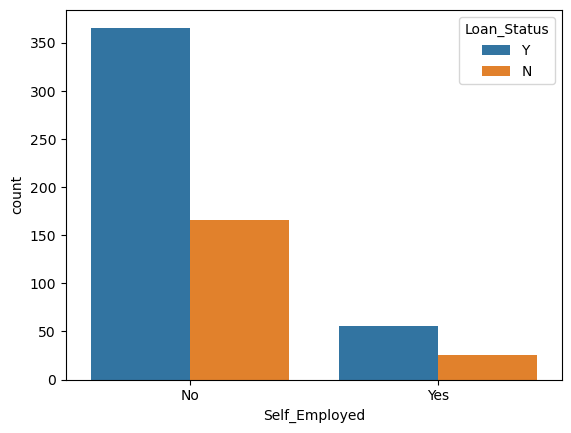

In [47]:
#Visualizing count of Self_Employed on the basis of loan status
sns.countplot(x="Self_Employed",hue="Loan_Status",data=df)
plt.show()

The applicants who are not self employed have the tendancy of getting their loans than self employed applicants.

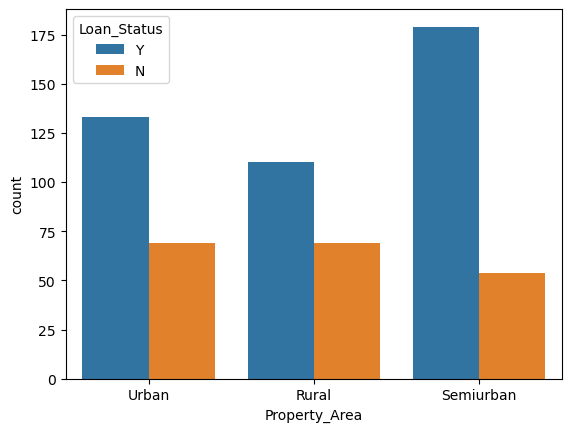

In [48]:
#Visualizing count of Property_Area on the basis of loan status
sns.countplot(x="Property_Area",hue="Loan_Status",data=df)
plt.show()

Most of the applicants from the Semiurban are applying for loan followed by Urban area. Also they have more chance of getting their loan approval.

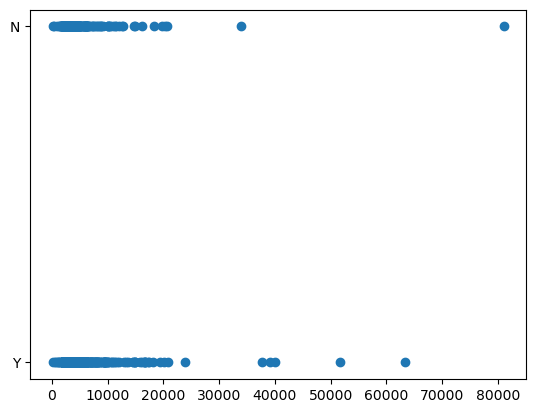

In [49]:
# ApplicantIncome vs Income

plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

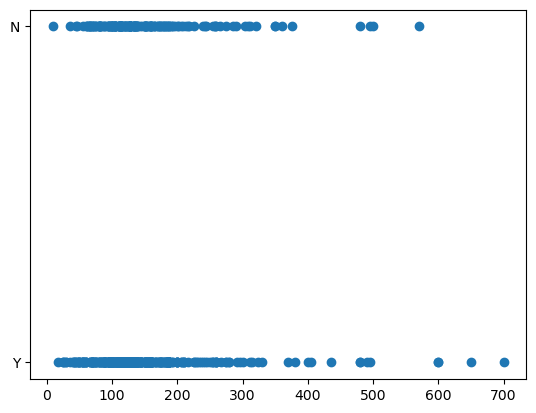

In [50]:
# LoanAmount vs Income

plt.scatter(df['LoanAmount'],df['Loan_Status'])

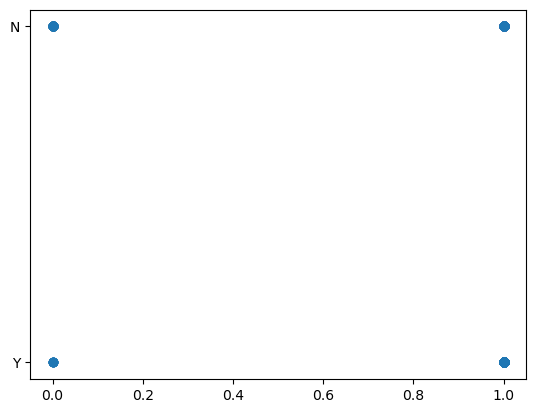

In [52]:
# Credit Hisory vs Income

plt.scatter(df['Credit_History'],df['Loan_Status'])

# Multivariate Analysis:

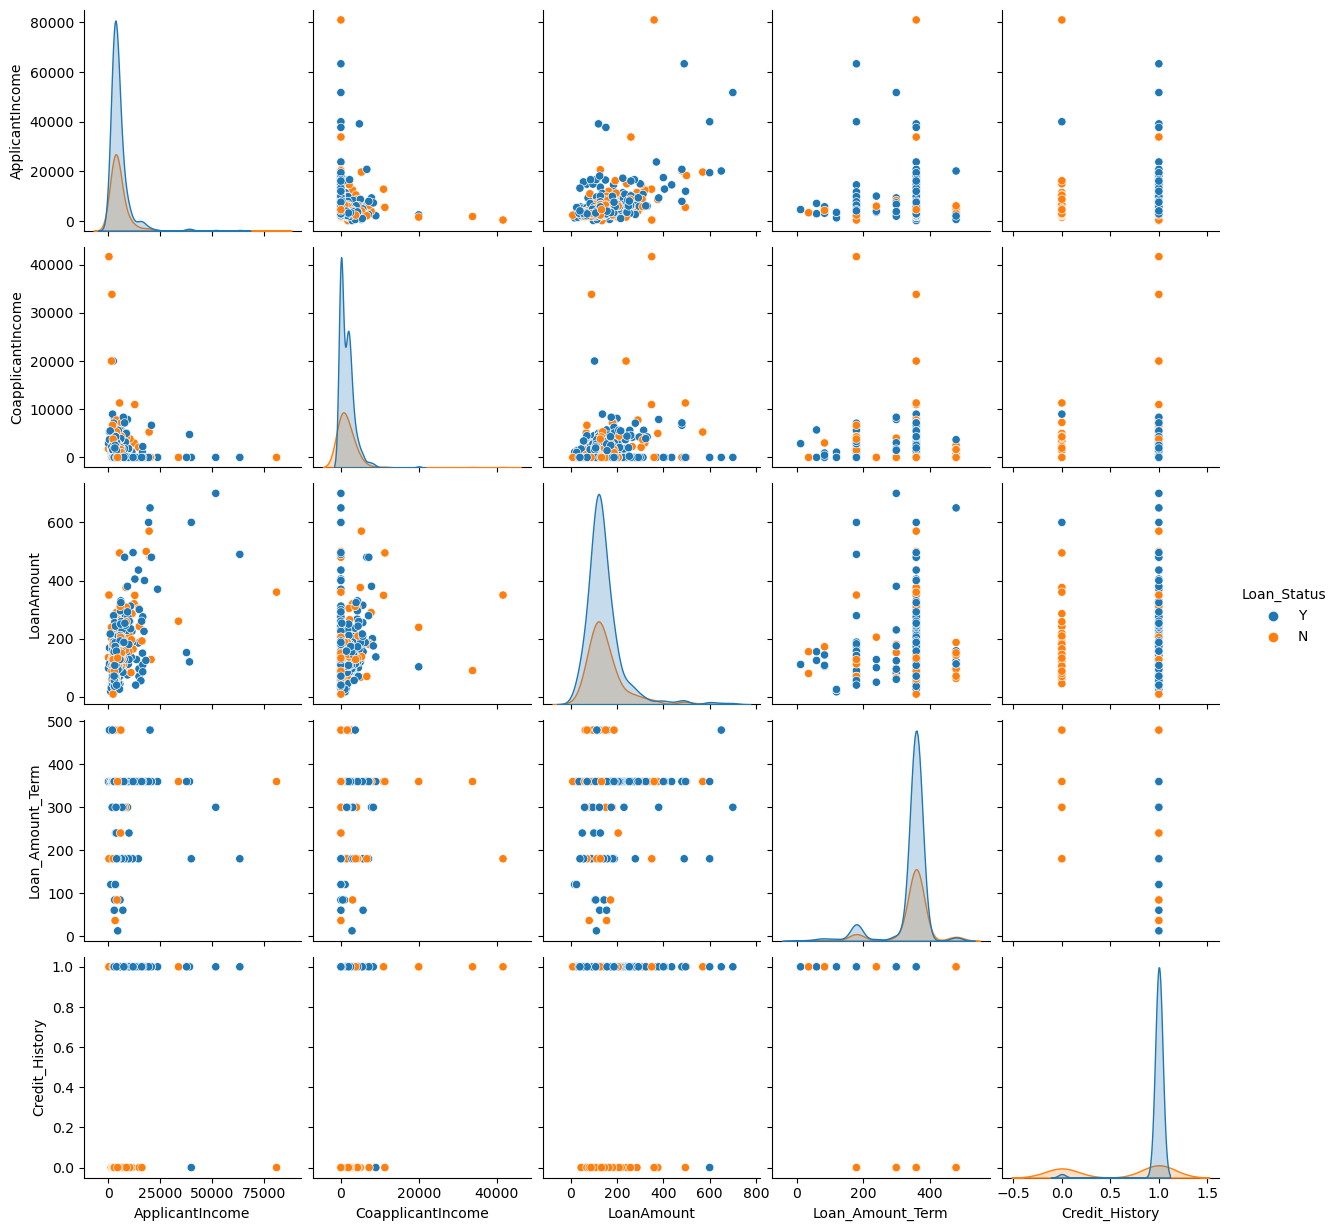

In [53]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Loan_Status")

We can observe the linear relationship between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount, ApplicantIncome and TotalIncome.

We can also observe the correlation in some columns also there are outliers present in some of the columns.

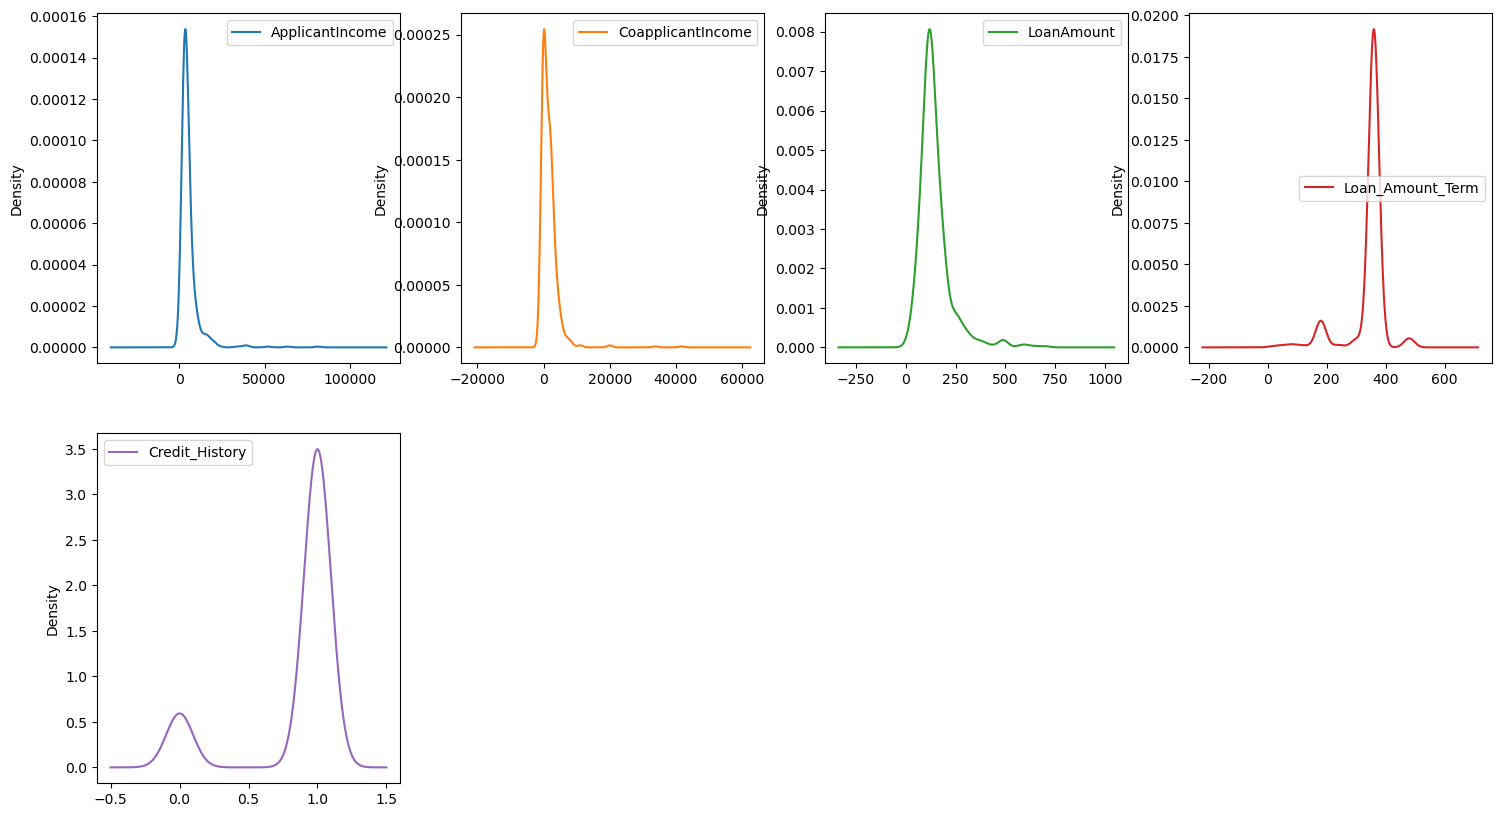

In [54]:
#check data distribution among all coulmns

df.plot(kind='density',subplots=True,layout=(2,4),sharex=False,legend=True,figsize=(18,10))
plt.show()

#Observation : We can see  skewness is present in data

# Identifying the outliers:

<Axes: >

<Figure size 2000x800 with 0 Axes>

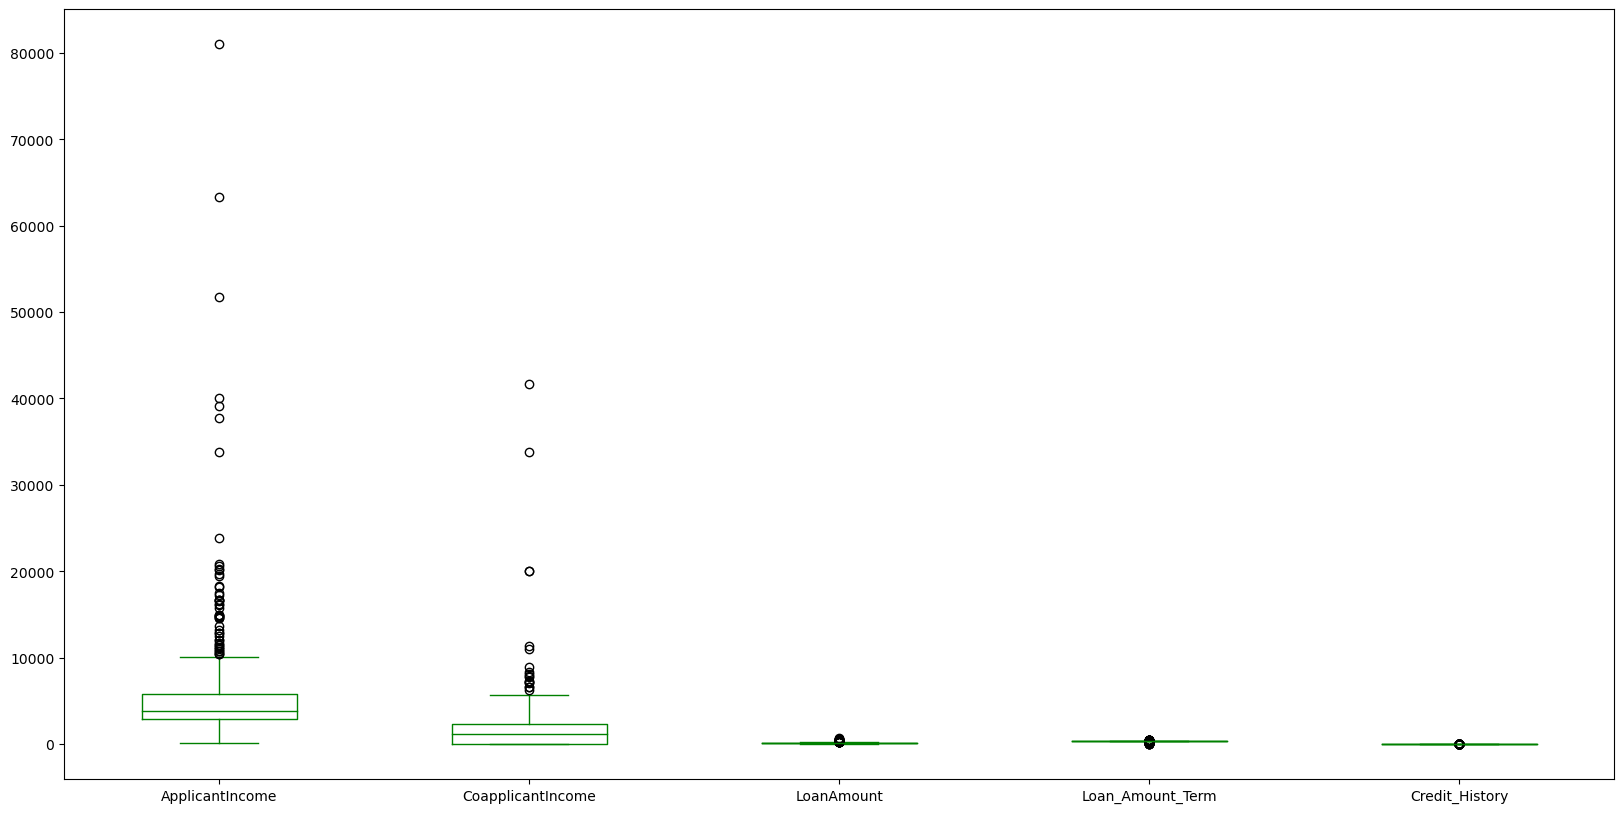

In [32]:
plt.figure(figsize=(20,8))
df.plot(kind='box',fontsize=10,figsize=(20,10),color='g')

We can observe the outliers present so we remove them using Zscore method.

Removing Outliers :

In [33]:
# Zscore method:

#Features having outliers
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [35]:
# Shape of original dataset

df.shape

(614, 12)

Before removing the outliers we had 614 rows and 12 columns in our dataset.

In [36]:
# Shape of new dataframe

df_new.shape

(577, 12)

After removing the outliers we have 577 rows and 12 columns.

In [37]:
# Checking the the data loss
data_loss = (614-577)/614*100
data_loss

6.026058631921824

I can see dataloss in zscore method after removing outliers of 6.0% which is less than 10%. So we check Skewness now.

# Encoding Categorical columns

In [38]:
# As our data has lot of string/object values so convert in numerical data

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_new.columns:
    if df_new[i].dtypes=="object":
        df_new[i]=le.fit_transform(df_new[i].values.reshape(-1,1))
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Correlation :

In [40]:
#Now we check correlation of input parameters with output "quality" :
#positively correlated : direct correlation
#negatively correlated : negative correlation

In [41]:
dfcor=df_new.corr()
dfcor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.026943,0.190543,0.158431,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.008567,0.237322,0.164365,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.077227,-0.026220,0.135554,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.166400,-0.037780,-0.149369,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.250665,-0.039572,0.121562,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.026943,-0.008567,0.077227,-0.166400,0.250665,1.000000,-0.220975,0.439526,-0.052101,0.036664,-0.003641,-0.005003
CoapplicantIncome,0.190543,0.237322,-0.026220,-0.037780,-0.039572,-0.220975,1.000000,0.312426,-0.058726,-0.011102,-0.093505,0.045009
LoanAmount,0.158431,0.164365,0.135554,-0.149369,0.121562,0.439526,0.312426,1.000000,0.039696,0.009694,-0.078882,-0.030169
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.052101,-0.058726,0.039696,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.036664,-0.011102,0.009694,0.027392,1.000000,-0.008121,0.560936


<Axes: >

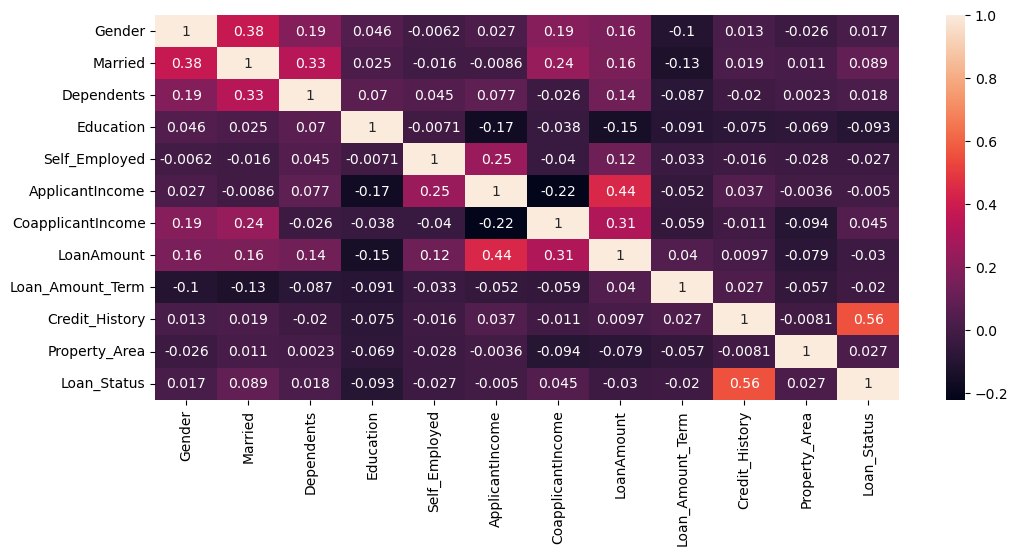

In [42]:
# For better understanding of correlation matrix between columns we draw heatmap :

plt.figure(figsize=(12,5))
sns.heatmap(dfcor,annot=True)

<Axes: >

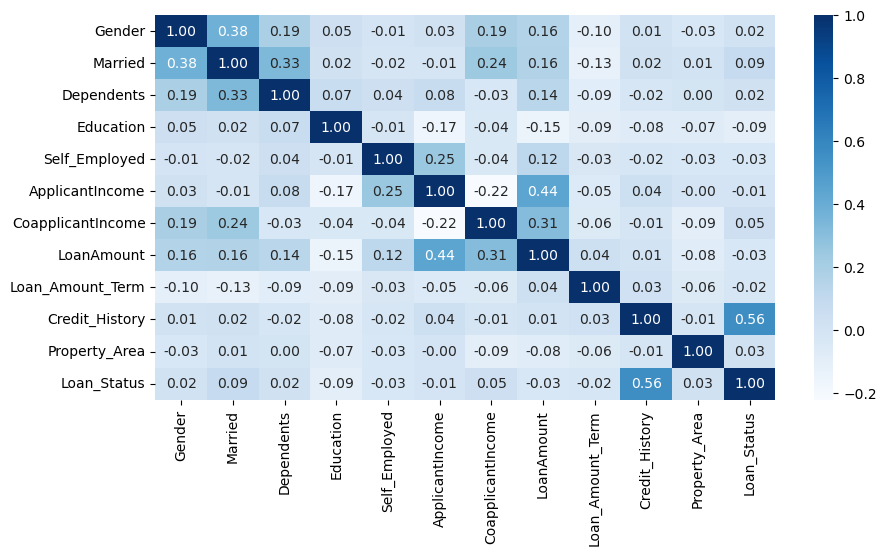

In [43]:
# We can change color also and decimal values place :

plt.figure(figsize=(10,5))
sns.heatmap(dfcor,annot=True,cmap='Blues',fmt='0.2f',cbar=True,square=False)

In [44]:
#Correlation of all columns with the target column 'Attrition':

df_new.corr()["Loan_Status"].sort_values()

Education           -0.092658
LoanAmount          -0.030169
Self_Employed       -0.026525
Loan_Amount_Term    -0.020291
ApplicantIncome     -0.005003
Gender               0.017408
Dependents           0.017872
Property_Area        0.026507
CoapplicantIncome    0.045009
Married              0.089026
Credit_History       0.560936
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

There is no multicolinearity issue.

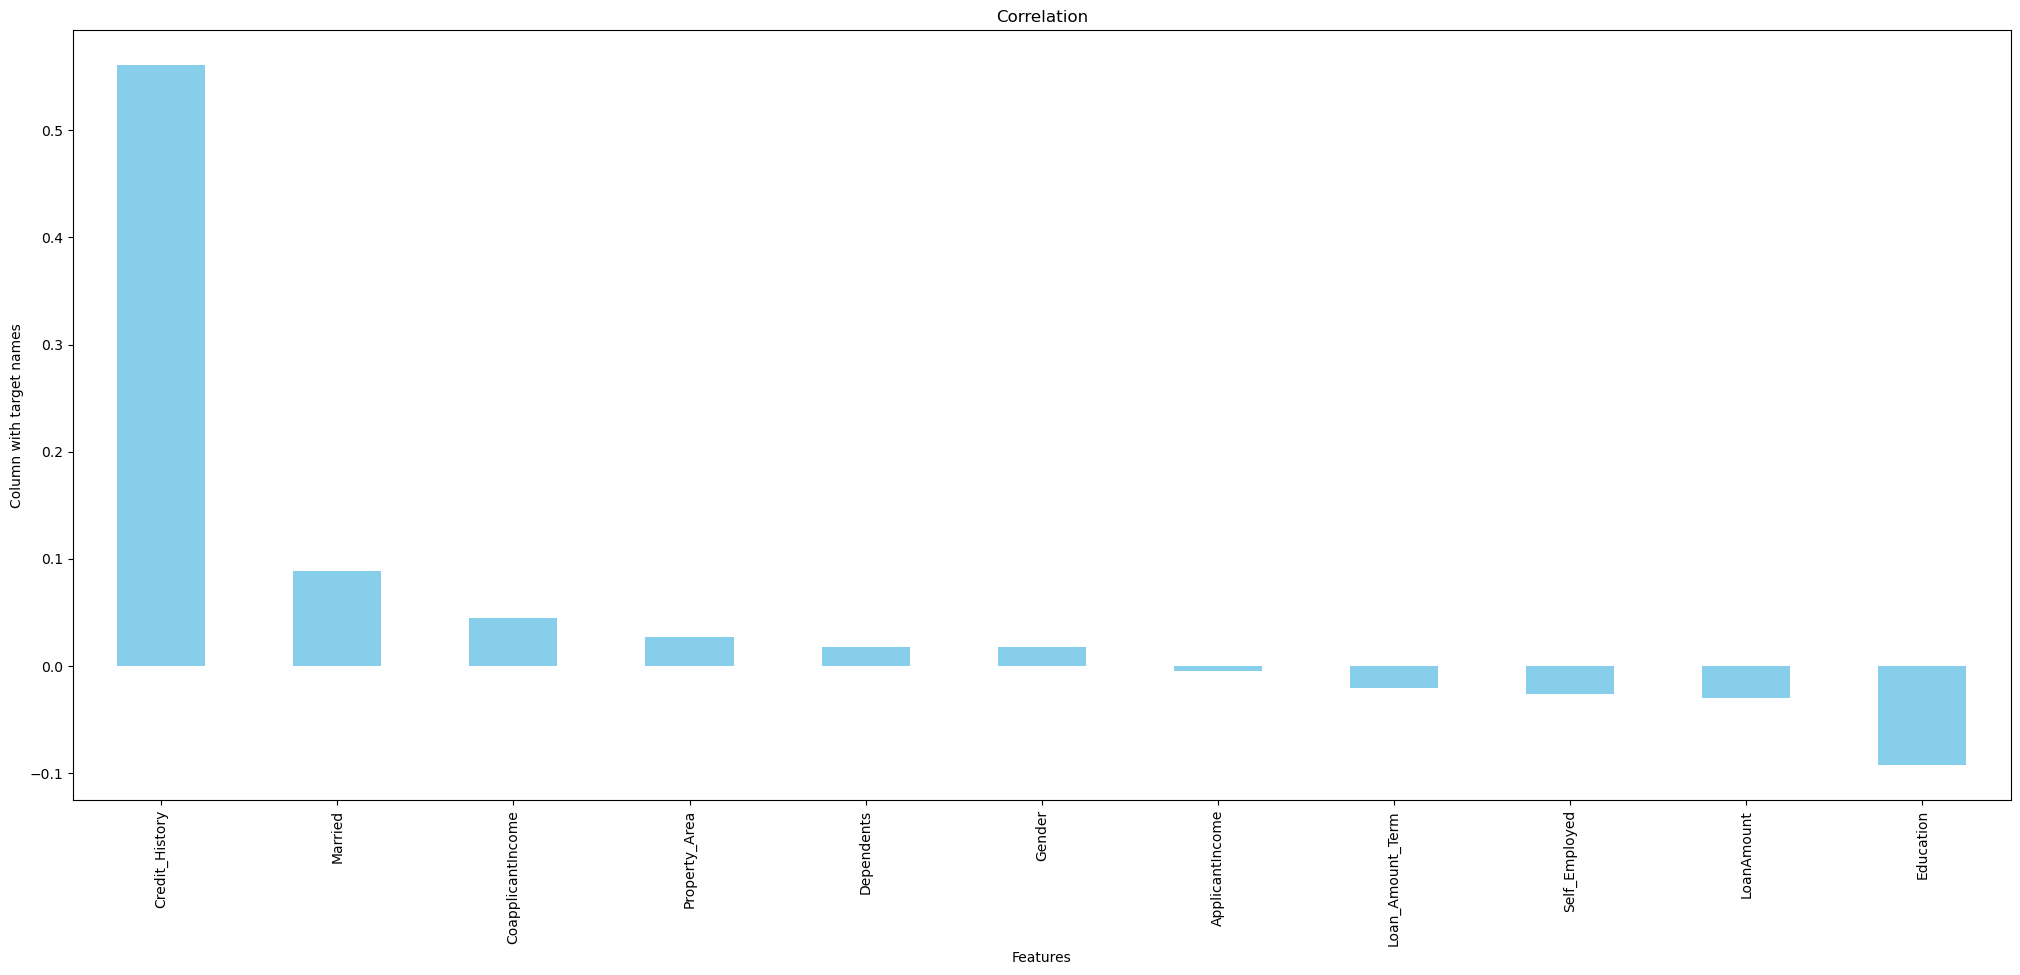

In [45]:
plt.figure(figsize =(25, 10))
df_new.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

Here the columns ApplicantIncome has very less correlation with the target so we can drop this column if necessary.

# Data Preprocessing :

Splitting the columns :

In [46]:
x=df_new.drop("Loan_Status", axis=1)
y=df_new["Loan_Status"]

# Handling Imbalance Data :

In [47]:
# Oversampling

from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)
y.value_counts()  

1    398
0    398
Name: Loan_Status, dtype: int64

# Check skewness

In [48]:
x.skew().sort_values(ascending=False)

Self_Employed        2.733662
ApplicantIncome      2.099324
Education            1.544760
CoapplicantIncome    1.327900
LoanAmount           1.262145
Dependents           1.227574
Property_Area        0.144500
Married             -0.269233
Gender              -1.220185
Credit_History      -1.240353
Loan_Amount_Term    -1.968871
dtype: float64

*Observation : Some skewness present in some parameters so we apply Transformation.

In [49]:
#Remove Skewness - apply power transformation

from sklearn.preprocessing import power_transform
x_new=power_transform(x,method='yeo-johnson')
x_new

array([[ 0.56187408, -1.14334876, -0.75897674, ...,  0.11462174,
         0.62181206,  1.28372184],
       [ 0.56187408,  0.87462377,  1.0711276 , ...,  0.11462174,
         0.62181206, -1.23310275],
       [ 0.56187408,  0.87462377, -0.75897674, ...,  0.11462174,
         0.62181206,  1.28372184],
       ...,
       [ 0.56187408, -1.14334876, -0.75897674, ...,  0.11462174,
         0.62181206, -1.23310275],
       [ 0.56187408, -1.14334876, -0.75897674, ...,  0.11462174,
         0.62181206, -1.23310275],
       [ 0.56187408, -1.14334876, -0.75897674, ...,  0.11462174,
         0.62181206, -1.23310275]])

In [50]:
x=pd.DataFrame(x_new,columns=x.columns)                                        #convert transformed data into DataFrame

In [51]:
x.skew().sort_values(ascending=False)

Self_Employed        2.733662
Education            1.544760
Loan_Amount_Term     0.628418
Dependents           0.592992
ApplicantIncome      0.051564
LoanAmount           0.051379
Property_Area       -0.083694
CoapplicantIncome   -0.108492
Married             -0.269233
Credit_History      -1.056797
Gender              -1.220185
dtype: float64

I have removed the skewness using yeo-johnson method. The skewness has been removed in all the numerical integer type columns.

# Feature Scaling :

In [52]:
# Scaling increases the model performance to much extent, we get best result after scaling data

# Standard Scaling :

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x1=st.fit_transform(x)
x1

array([[ 0.56187408, -1.14334876, -0.75897674, ...,  0.11462174,
         0.62181206,  1.28372184],
       [ 0.56187408,  0.87462377,  1.0711276 , ...,  0.11462174,
         0.62181206, -1.23310275],
       [ 0.56187408,  0.87462377, -0.75897674, ...,  0.11462174,
         0.62181206,  1.28372184],
       ...,
       [ 0.56187408, -1.14334876, -0.75897674, ...,  0.11462174,
         0.62181206, -1.23310275],
       [ 0.56187408, -1.14334876, -0.75897674, ...,  0.11462174,
         0.62181206, -1.23310275],
       [ 0.56187408, -1.14334876, -0.75897674, ...,  0.11462174,
         0.62181206, -1.23310275]])

In [53]:
x=pd.DataFrame(x1,columns=x.columns)                                   #convert scaled data into DataFrame

In [54]:
# Multicollinearity Check VIF Technique

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
    
vif_calc()

    VIF Factor           features
0     1.270111             Gender
1     1.513622            Married
2     1.188551         Dependents
3     1.053629          Education
4     1.056361      Self_Employed
5     1.790220    ApplicantIncome
6     1.690753  CoapplicantIncome
7     1.666247         LoanAmount
8     1.044764   Loan_Amount_Term
9     1.021647     Credit_History
10    1.037632      Property_Area


* Observation : As vif value < 10 so no multicollinearity present

# Train and Test Splitting :

In [56]:
## Metrics Imported :
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [57]:
from sklearn.tree import DecisionTreeClassifier

maxAccu=0                            #maximum accuracy
maxRS=0                             #best random state for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)                                #fitting the data will train your model
    predrf=dt.predict(x_test)                              #Predicted Target Variable
    acc=accuracy_score(y_test,predrf)
    print('testing accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

testing accuracy 0.7 random_state 1
max_accuracy 0.7 max_random_state 1
testing accuracy 0.79375 random_state 2
max_accuracy 0.79375 max_random_state 2
testing accuracy 0.825 random_state 3
max_accuracy 0.825 max_random_state 3
testing accuracy 0.8 random_state 4
testing accuracy 0.78125 random_state 5
testing accuracy 0.78125 random_state 6
testing accuracy 0.75 random_state 7
testing accuracy 0.76875 random_state 8
testing accuracy 0.79375 random_state 9
testing accuracy 0.775 random_state 10
testing accuracy 0.75625 random_state 11
testing accuracy 0.7875 random_state 12
testing accuracy 0.7875 random_state 13
testing accuracy 0.7375 random_state 14
testing accuracy 0.81875 random_state 15
testing accuracy 0.75 random_state 16
testing accuracy 0.7875 random_state 17
testing accuracy 0.725 random_state 18
testing accuracy 0.80625 random_state 19
testing accuracy 0.80625 random_state 20
testing accuracy 0.73125 random_state 21
testing accuracy 0.78125 random_state 22
testing accuracy 

I observed best accuracy .85 at random state = 29

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=29)

In [59]:
x.shape,x_train.shape,x_test.shape

((796, 11), (636, 11), (160, 11))

# Classification Algorithms:

Modelling :

1. LOGISTICS REGRESSION

In [60]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

LR.fit(x_train,y_train)

LogisticRegression()

Our Model is successfully trained , Lets perform prediction

In [61]:
pred_train_lr=LR.predict(x_train)
predlr=LR.predict(x_test)
print("Training Accuracy",accuracy_score(y_train,pred_train_lr)*100) 
print("Testing Accuracy:-",accuracy_score(y_test,predlr)*100)                               #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predlr))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predlr))                    # Take Classification report as CR

Training Accuracy 80.50314465408806
Testing Accuracy:- 80.625
CM:- [[61 22]
 [ 9 68]]
CR:-               precision    recall  f1-score   support

           0       0.87      0.73      0.80        83
           1       0.76      0.88      0.81        77

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.82      0.81      0.81       160



In [62]:
from sklearn.model_selection import cross_val_score
cr_1=cross_val_score(LR,x,y,cv=7)
print("Cross Validation Score of Logistic Regression model:-",cr_1.mean())
diff_1=accuracy_score(y_test,predlr)-cr_1.mean()
print("diff between accuracy score and cross validation score is -",diff_1)

Cross Validation Score of Logistic Regression model:- 0.7916139907290349
diff between accuracy score and cross validation score is - 0.014636009270965089


2. Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
pred_train_dtc=dt.predict(x_train)
preddt=dt.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_dtc)*100) 
print("Testing Accuracy",accuracy_score(y_test,preddt)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,preddt))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,preddt))                    # Take Classification report as CR

Training Accuracy 100.0
Testing Accuracy 78.75
CM:- [[64 19]
 [15 62]]
CR:-               precision    recall  f1-score   support

           0       0.81      0.77      0.79        83
           1       0.77      0.81      0.78        77

    accuracy                           0.79       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.79      0.79      0.79       160



In [65]:
from sklearn.model_selection import cross_val_score
cr_2=cross_val_score(dt,x,y,cv=7)
print("Cross Validation Score of Decision Tree Classifier:-",cr_2.mean())
diff_2=accuracy_score(y_test,preddt)-cr_2.mean()
print("diff between accuracy score and cross validation score is -",diff_2)

Cross Validation Score of Decision Tree Classifier:- 0.7701000288331448
diff between accuracy score and cross validation score is - 0.01739997116685521


3. Support Vector Classifier

In [66]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [67]:
pred_train_svc=svc.predict(x_train)
predsvc=svc.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_svc)*100) 
print("Testing Accuracy",accuracy_score(y_test,predsvc)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predsvc))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predsvc))                    # Take Classification report as CR

Training Accuracy 83.64779874213836
Testing Accuracy 81.875
CM:- [[61 22]
 [ 7 70]]
CR:-               precision    recall  f1-score   support

           0       0.90      0.73      0.81        83
           1       0.76      0.91      0.83        77

    accuracy                           0.82       160
   macro avg       0.83      0.82      0.82       160
weighted avg       0.83      0.82      0.82       160



In [68]:
from sklearn.model_selection import cross_val_score
cr_3=cross_val_score(svc,x,y,cv=7)
print("Cross Validation Score of Support Vector Classifier:-",cr_3.mean())
diff_3=accuracy_score(y_test,predsvc)-cr_3.mean()
print("diff between accuracy score and cross validation score is -",diff_3)

Cross Validation Score of Support Vector Classifier:- 0.7965821633730343
diff between accuracy score and cross validation score is - 0.022167836626965642


4. MultinomialNB

In [69]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
mnb.fit(abs(x_train),y_train)

MultinomialNB()

In [70]:
pred_train_mnb=mnb.predict(x_train)
predmnb=mnb.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_mnb)*100) 
print("Testing Accuracy",accuracy_score(y_test,predmnb)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predmnb))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predmnb))                    # Take Classification report as CR

Training Accuracy 33.64779874213836
Testing Accuracy 36.25
CM:- [[35 48]
 [54 23]]
CR:-               precision    recall  f1-score   support

           0       0.39      0.42      0.41        83
           1       0.32      0.30      0.31        77

    accuracy                           0.36       160
   macro avg       0.36      0.36      0.36       160
weighted avg       0.36      0.36      0.36       160



In [71]:
from sklearn.model_selection import cross_val_score
cr_4=cross_val_score(mnb,abs(x),y,cv=7)
print("Cross Validation Score of MultinomialNB:-",cr_4.mean())
diff_4=accuracy_score(y_test,predmnb)-cr_4.mean()
print("diff between accuracy score and cross validation score is -",diff_4)

Cross Validation Score of MultinomialNB:- 0.6835895047352895
diff between accuracy score and cross validation score is - -0.32108950473528947


5. KNeighbors Classifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit((x_train),y_train)

KNeighborsClassifier()

In [73]:
pred_train_knn=knn.predict(x_train)
predknn=knn.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_knn)*100) 
print("Testing Accuracy",accuracy_score(y_test,predknn)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predknn))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predknn))                    # Take Classification report as CR

Training Accuracy 82.38993710691824
Testing Accuracy 71.25
CM:- [[59 24]
 [22 55]]
CR:-               precision    recall  f1-score   support

           0       0.73      0.71      0.72        83
           1       0.70      0.71      0.71        77

    accuracy                           0.71       160
   macro avg       0.71      0.71      0.71       160
weighted avg       0.71      0.71      0.71       160



In [74]:
from sklearn.model_selection import cross_val_score
cr_5=cross_val_score(knn,x,y,cv=7)
print("Cross Validation Score of KNeighbors Classifier:-",cr_5.mean())
diff_5=accuracy_score(y_test,predknn)-cr_5.mean()
print("diff between accuracy score and cross validation score is -",diff_5)

Cross Validation Score of KNeighbors Classifier:- 0.7437066116618982
diff between accuracy score and cross validation score is - -0.031206611661898198


# Ensemble Method :

6. Random Forest Classifier :

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
pred_train_rf=rf.predict(x_train)
predrf=rf.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_rf)*100) 
print("Testing Accuracy",accuracy_score(y_test,predrf)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predrf))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predrf))                    # Take Classification report as CR

Training Accuracy 100.0
Testing Accuracy 85.0
CM:- [[68 15]
 [ 9 68]]
CR:-               precision    recall  f1-score   support

           0       0.88      0.82      0.85        83
           1       0.82      0.88      0.85        77

    accuracy                           0.85       160
   macro avg       0.85      0.85      0.85       160
weighted avg       0.85      0.85      0.85       160



In [77]:
from sklearn.model_selection import cross_val_score
cr_6=cross_val_score(rf,x,y,cv=7)
print("Cross Validation Score of Random Forest Classifier:-",cr_6.mean())
diff_6=accuracy_score(y_test,predrf)-cr_6.mean()
print("diff between accuracy score and cross validation score is -",diff_6)

Cross Validation Score of Random Forest Classifier:- 0.8267793377248431
diff between accuracy score and cross validation score is - 0.023220662275156845


7. Gradient Boosting Classifier:

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [79]:
pred_train_gbc=gbc.predict(x_train)
predgbc=gbc.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_gbc)*100) 
print("Testing Accuracy",accuracy_score(y_test,predgbc)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predgbc))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predgbc))                    # Take Classification report as CR

Training Accuracy 90.09433962264151
Testing Accuracy 78.75
CM:- [[61 22]
 [12 65]]
CR:-               precision    recall  f1-score   support

           0       0.84      0.73      0.78        83
           1       0.75      0.84      0.79        77

    accuracy                           0.79       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.79      0.79      0.79       160



In [80]:
from sklearn.model_selection import cross_val_score
cr_7=cross_val_score(gbc,x,y,cv=7)
print("Cross Validation Score of Gradient Boosting Classifier:-",cr_7.mean())
diff_7=accuracy_score(y_test,predgbc)-cr_7.mean()
print("diff between accuracy score and cross validation score is -",diff_7)

Cross Validation Score of Gradient Boosting Classifier:- 0.8167210060549603
diff between accuracy score and cross validation score is - -0.029221006054960363


In [81]:
result = pd.DataFrame({'Models':['LR','dt','svc','mnb','knn','rf','gbc'],
                       'Accuracy':[accuracy_score(y_test,predlr)*100,
                                   accuracy_score(y_test,preddt)*100,
                                   accuracy_score(y_test,predsvc)*100,
                                   accuracy_score(y_test,predmnb)*100,
                                   accuracy_score(y_test,predknn)*100,
                                   accuracy_score(y_test,predrf)*100,
                                   accuracy_score(y_test,predgbc)*100],
                     'Difference of accuracy and cross-val':[diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7]})
result        

,Models,Accuracy,Difference of accuracy and cross-val
0,LR,80.625,0.014636
1,dt,78.750,0.017400
2,svc,81.875,0.022168
3,mnb,36.250,-0.321090
4,knn,71.250,-0.031207
5,rf,85.000,0.023221
6,gbc,78.750,-0.029221


By looking into the difference of model accuracy and cross validation score i found that RFC as best model.

# Hyper Parameter tuning:

In [82]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [83]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [ ]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=7)
GCV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [ ]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 25, 'max_features': 'auto', 'n_estimators': 400}

Got the best parameters for RFC.

# Taking RFC as final Model

In [93]:
Final_model=RandomForestClassifier(max_features='log2',criterion='entropy',n_estimators=400,max_depth=25)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.0


I got best model as RFC and i got the accuracy 85 % after tunning which is good.!!!!

# Saving the model:

In [94]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_model,"Loan_Status.pkl")

['Loan_Status.pkl']

# Loading the saved model

In [95]:
model=joblib.load("Loan_Status.pkl")

# Prediction

In [96]:
conclusion=pd.DataFrame([Final_model.predict(x_test)[:],predrf[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Predicted,0,0,1,1,1,1,0,1,0,1,...,0,0,0,1,1,0,1,1,0,1
Original,0,0,1,1,1,1,0,1,0,1,...,0,0,0,1,1,0,1,1,0,1


Above are the predicted values and the actual values.They are almost similar.

# Prediction on New Data

In [97]:
input_data=(1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2)

# Changing data into numpy array
input_data_nparray=np.asarray(input_data)

# reshaping data as we are predicting label for only one instance
input_data_reshaped=input_data_nparray.reshape(1,-1)

prediction=Final_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Loan will approve')
else:
    print('Loan will not approve')

[0]
Loan will not approve


# Completed Loan Status Prediction